## Udemy Project: A Python Analysis of Online Course Offerings

<span style="color:#3d5a80; font-size:12px">**Author: Kliz John Andrei Millares**</span>

Source: <b>[Kaggle Udemy Dataset](https://www.kaggle.com/datasets/thedevastator/udemy-courses-revenue-generation-and-course-anal?fbclid=IwZXh0bgNhZW0CMTAAAR2wJruIgvRk4ndf-EaDimjMoJHZzarZSad6n5uwdR6IHunb6vyuO_f3iZ0_aem_Af624ZtNgQIEkyzuvI2_6qM7kOZrTu-Ao_ms5szGalwn1KrthMKZrKsfWHq3Heuu1A3P9PEUOIzwYNng9uEnsnHA)</b>


<p style="font-size: 18px;"><b>Load the necessary libraries</b></p>

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

<p style="font-size: 18px; color: #06d6a0;"><b>Read the data from the Excel file</b></p>



In [34]:
courses_data = pd.read_excel("C:/Users/Guest123/Documents/Excel Data Analysis/Capstone Proj/udemy_courses excel.xlsx")

<p style="font-size: 18px; color: #ef476f;"><b>Preparing Data for Visualization</b></p> 

In [35]:
# Count the number of courses for each subject
subject_counts = courses_data['subject'].value_counts().reset_index()

# Rename the columns
subject_counts.columns = ['Subject', 'Count']

# Determine the number of unique subjects
num_subjects = len(subject_counts)

# Create a list of colors
colors = plt.cm.rainbow(np.linspace(0, 1, num_subjects))

# Determine the maximum count value
max_count = subject_counts['Count'].max()

# Increase the maximum height of the bars by adding some margin
max_count_with_margin = max_count * 1.2  # Adjust the multiplier as needed

<p style="font-size: 18px; color: #118ab2;"><b>Visualizing Course Distribution by Subject</b></p> 

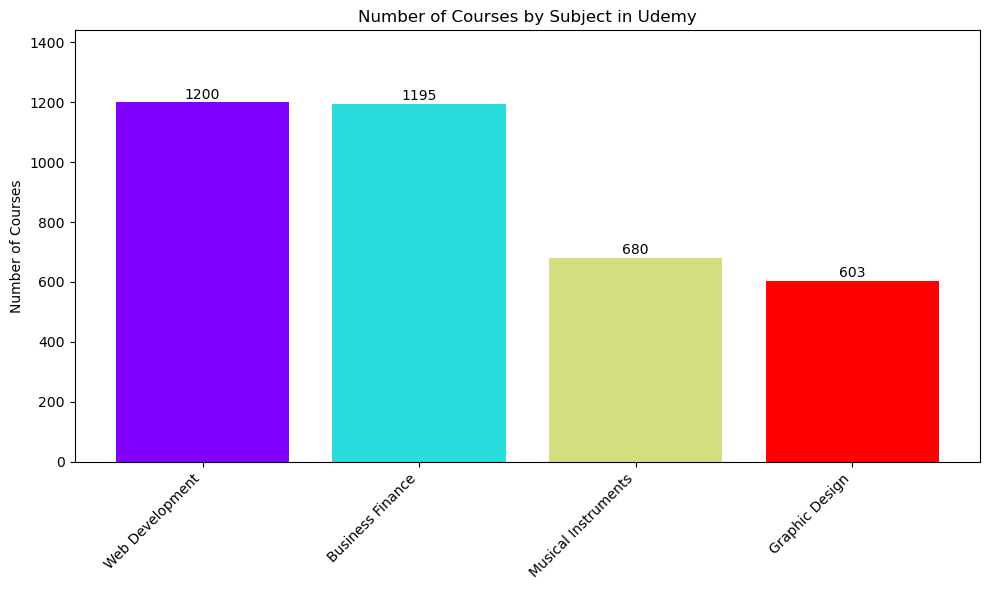

In [36]:
# Create the bar chart using matplotlib
plt.figure(figsize=(10, 6))
for i in range(num_subjects):
    plt.bar(subject_counts['Subject'][i], subject_counts['Count'][i], color=colors[i])

plt.title("Number of Courses by Subject in Udemy")
plt.ylabel("Number of Courses")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.ylim(0, max_count_with_margin)  # Adjust the y-axis limits

# Add text labels on top of each bar
for i, count in enumerate(subject_counts['Count']):
    plt.text(i, count + max_count * 0.01, str(count), ha='center')

plt.tight_layout()
plt.show()


<p style="font-size: 18px;"><b>Next, I will calculate the total number of subscribers for each subject and their respective percentages of the total subscribers</b></p>

In [37]:
total_subscribers = courses_data.groupby('subject')['num_subscribers'].sum().reset_index()

# Calculate the percentage of total subscribers for each subject
total_subscribers['percentage'] = (total_subscribers['num_subscribers'] / total_subscribers['num_subscribers'].sum()) * 100

<p style="font-size: 18px; color: #118ab2;"><b>Visualizing the percentage% of total subscribers attributed to each subject category</b></p> 

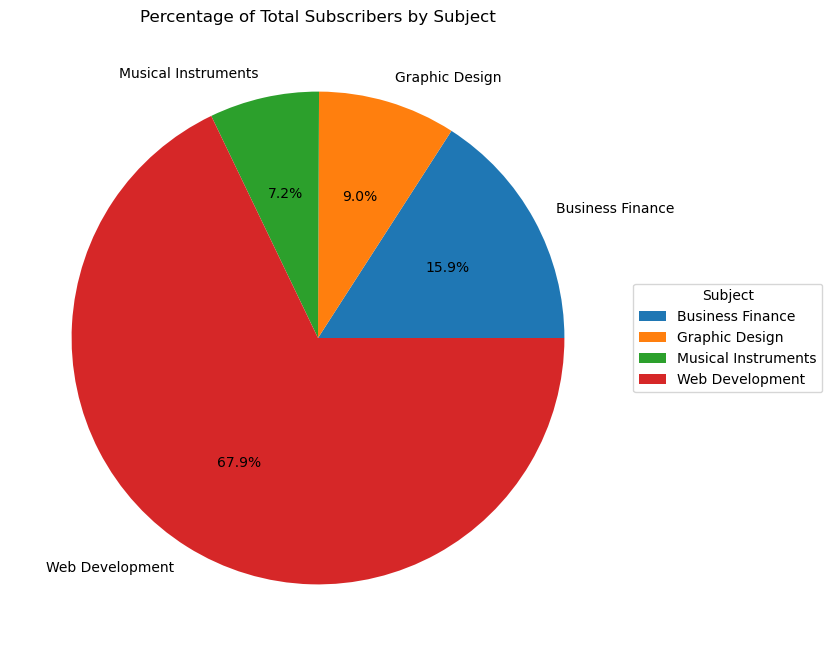

In [38]:
# Create a custom color palette
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Create the pie chart using matplotlib with custom colors and text appearance
plt.figure(figsize=(8, 8))
plt.pie(total_subscribers['num_subscribers'], labels=total_subscribers['subject'], autopct='%1.1f%%', colors=custom_colors)
plt.title("Percentage of Total Subscribers by Subject")
plt.legend(title='Subject', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

<p style="font-size: 18px;"><b>Lets create the distribution of prices for Udemy courses</b></p>
<p style="font-size: 18px; color: #118ab2;"><b>Visualizing the histogram of the Price</b></p> 

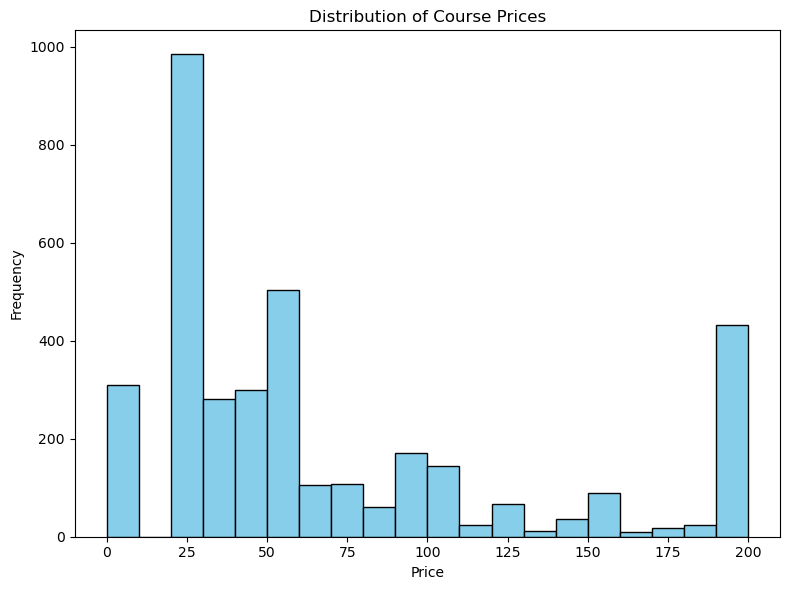

In [39]:
# Create histograms for numerical variables
histograms = {}

# Histogram for price
plt.figure(figsize=(8, 6))
plt.hist(courses_data['price'], bins=range(0, int(courses_data['price'].max()) + 10, 10), color='skyblue', edgecolor='black')
plt.title('Distribution of Course Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

<p style="font-size: 18px;"><b>Formatting the Date and Extract year from published_timestamp</b></p>

In [40]:
courses_data['published_timestamp'] = pd.to_datetime(courses_data['published_timestamp'])
courses_data['year'] = courses_data['published_timestamp'].dt.year
courses_published = courses_data.groupby('year').size().reset_index(name='num_courses')

<p style="font-size: 18px; color: #219ebc;"><b>Lets plot the number of courses published over time.</b></p> 

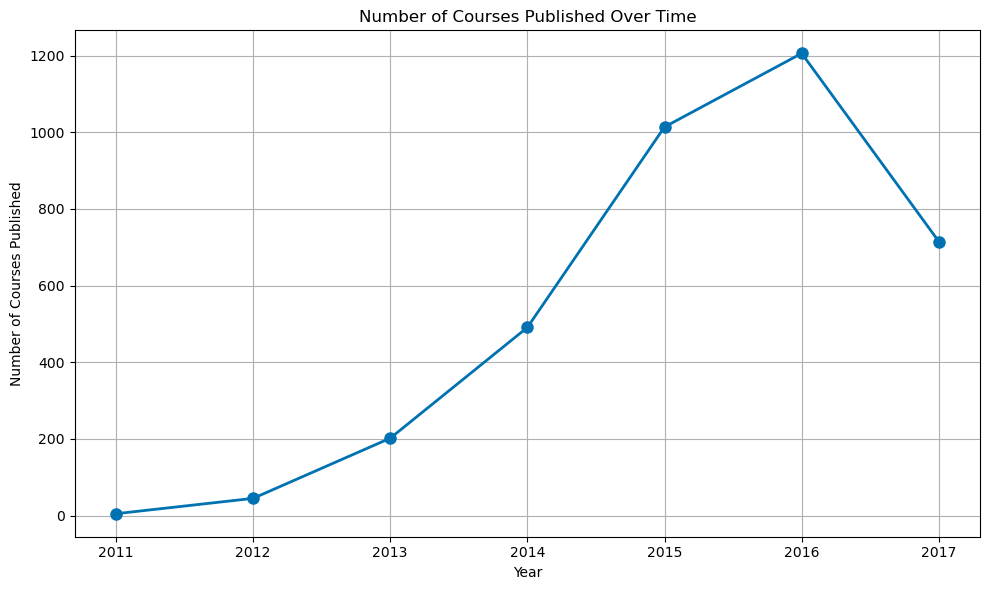

In [41]:
# Create a line plot to visualize the number of courses published over time
plt.figure(figsize=(10, 6))
plt.plot(courses_published['year'], courses_published['num_courses'], marker='o', color='#0072B2', markersize=8, linewidth=2)
plt.title('Number of Courses Published Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Courses Published')
plt.grid(True)
plt.tight_layout()
plt.show()

<p style="font-size: 18px;"><b>I utilized the seaborn library to analyze the correlation between numerical variables in a dataset</b></p>

In [42]:
import seaborn as sns

# Select numerical variables for correlation analysis
numerical_vars = courses_data[["price", "num_subscribers", "num_reviews", "num_lectures", "content_duration"]]

# Calculate the correlation matrix
correlation_matrix = numerical_vars.corr()

print(correlation_matrix)

                     price  num_subscribers  num_reviews  num_lectures  \
price             1.000000         0.050769     0.113696      0.330160   
num_subscribers   0.050769         1.000000     0.649946      0.157746   
num_reviews       0.113696         0.649946     1.000000      0.243029   
num_lectures      0.330160         0.157746     0.243029      1.000000   
content_duration  0.293450         0.161839     0.228889      0.801647   

                  content_duration  
price                     0.293450  
num_subscribers           0.161839  
num_reviews               0.228889  
num_lectures              0.801647  
content_duration          1.000000  


<p style="font-size: 18px; color: #118ab2;"><b>Plotting the Heatmap</b></p> 

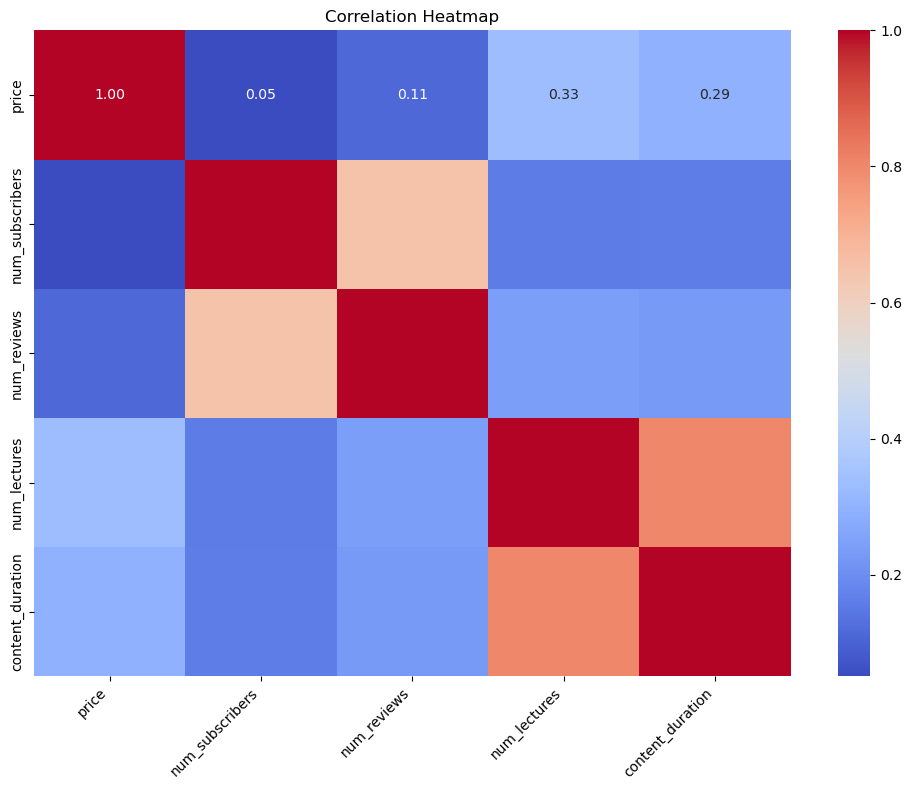

In [43]:
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<p style="font-size: 24px; color: #084c61; text-align: center;"><b>Summary of Python Project on Udemy Online Course Data</b></p>


This project analyzed Udemy online course data to gain insights into course offerings and customer preferences. Here are the key findings:

-   **Price Distribution:** The majority of Udemy courses are priced between 0 and 50 units, indicating that there is a wide range of affordable options available to learners. This suggests that Udemy's pricing strategy may focus on accessibility and affordability, making it easier for learners to access a variety of courses without significant financial barriers.
-   **Subscriber Base:** There was a significant upward trend in the number of courses published on Udemy from 2012 to 2016.  However, there was a notable decrease in the number of courses published in 2017 compared to the peak year of 2016. 
-   **Pricing Strategy:** The average course price is \$66, with 67% priced lower for affordability.
-   **Customer Satisfaction:** 58% of courses have above-average ratings, reflecting customer appreciation.
-   **Correlation Analysis:** There is a very weak positive correlation (correlation coefficient ≈ 0.051) between the price of courses and the number of subscribers. This suggests that the price of a course has little to no impact on its popularity among subscribers.

Overall, the analysis highlights the success of Web Development courses and a positive trend between course ratings and subscribers. These insights can be used to optimize course offerings and marketing strategies to better serve customer needs.

<center><b>Trademark © Kliz John Millares</b></center>
